In [246]:
from FamineStore import FamineStore
import matplotlib.pyplot as plt
import pandas as pd

In [247]:
store = FamineStore()

Loading data for all regions
Loading famine data for Awdal
Loading famine data for Gedo
Insufficient data for region Gedo, trying to fit with data will give an over-fitted model
Famine dataset loaded for Awdal
Region Gedo not defined, skipping
Using cached StanModel
Reading model fit from stan\fits\FamineModel_Beta_v1_fit_famine_beta_1_Awdal_fa5f488868aaf2077afbcb4bf514c335.fit
Calculating prediction data up to q1/2021
Famine dataset loaded for Awdal
Successfully loaded data, datasets and predictions for regions:
- Awdal
Skipped regions:
- Gedo


In [248]:
store.per_region_data["Awdal"].keys()

dict_keys(['food_df', 'ffood_df', 'conflict_df', 'ipc_df', 'weather_df', '_feature_names', '_start_year', '_start_quarter', '_end_year', '_end_quater', '_food_items', '_ffood_items'])

In [249]:
# Monthly
store.per_region_data["Awdal"]["food_df"]

,Date,Region,Market,Item,Price,Year,Month,Quarter
0,2015.000000,Awdal,Borama,Maize (white),4000.0,2015,1,1
1,2015.084932,Awdal,Borama,Maize (white),4000.0,2015,2,1
2,2015.161644,Awdal,Borama,Maize (white),4000.0,2015,3,1
3,2015.246575,Awdal,Borama,Maize (white),4000.0,2015,4,2
4,2015.328767,Awdal,Borama,Maize (white),4000.0,2015,5,2
...,...,...,...,...,...,...,...,...
175,2019.580822,Awdal,Borama,Rice (imported),6250.0,2019,8,3
176,2019.665753,Awdal,Borama,Rice (imported),6475.0,2019,9,3
177,2019.747945,Awdal,Borama,Rice (imported),6700.0,2019,10,4
178,2019.832877,Awdal,Borama,Rice (imported),6500.0,2019,11,4


In [250]:
# Monthly
store.per_region_data["Awdal"]["ffood_df"].shape

(56, 8)

In [251]:
# Daily - Sum over by month
store.per_region_data["Awdal"]["conflict_df"]

,Region,Date,Fatalities,Year,Month,Day,Quarter
90,Awdal,2015.041096,0,2015,1,16,1
91,Awdal,2015.049315,0,2015,1,19,1
92,Awdal,2015.109589,0,2015,2,10,1
93,Awdal,2015.117808,0,2015,2,13,1
94,Awdal,2015.153425,0,2015,2,26,1
...,...,...,...,...,...,...,...
212,Awdal,2019.819178,0,2019,10,27,4
213,Awdal,2019.835616,0,2019,11,2,4
214,Awdal,2019.865753,10,2019,11,13,4
215,Awdal,2019.873973,0,2019,11,16,4


In [259]:
# Daily - take percentage changes?
store.per_region_data["Awdal"]["weather_df"]

,Station,Date,Temperature,Year,Month,Day,Quarter
3320,EGAL INTL,2016.453552,83.5,2016,6,15,2
3321,EGAL INTL,2016.456284,77.4,2016,6,16,2
3322,EGAL INTL,2016.478142,71.6,2016,6,24,2
3323,EGAL INTL,2016.486339,75.6,2016,6,27,2
3324,EGAL INTL,2016.489071,77.4,2016,6,28,2
...,...,...,...,...,...,...,...
4453,EGAL INTL,2019.986301,66.0,2019,12,27,4
4454,EGAL INTL,2019.989041,67.3,2019,12,28,4
4455,EGAL INTL,2019.991781,68.0,2019,12,29,4
4456,EGAL INTL,2019.994521,67.7,2019,12,30,4


In [253]:
# Monthly
store.per_region_pred_data["Awdal"]["food_df"]

,Date,Region,Market,Item,Price,Year,Month,Quarter
0,2015.000000,Awdal,Borama,Maize (white),4000.0,2015,1,1
1,2015.084932,Awdal,Borama,Maize (white),4000.0,2015,2,1
2,2015.161644,Awdal,Borama,Maize (white),4000.0,2015,3,1
3,2015.246575,Awdal,Borama,Maize (white),4000.0,2015,4,2
4,2015.328767,Awdal,Borama,Maize (white),4000.0,2015,5,2
...,...,...,...,...,...,...,...,...
220,2020.833333,Awdal,Borama,Sorghum (red),4000.0,2020,11,4
221,2020.915301,Awdal,Borama,Sorghum (red),4000.0,2020,12,4
222,2021.000000,Awdal,Borama,Sorghum (red),4000.0,2021,1,1
223,2021.084932,Awdal,Borama,Sorghum (red),4000.0,2021,2,1


In [254]:
x = store.per_region_pred_data["Awdal"]["conflict_df"].groupby(["Region", "Year", "Month"], as_index=False).sum()
x.Date = x.Year + (x.Month -1) / 12
x.Quarter = x.Month // 4 + 1
x = x[["Region", "Year", "Month", "Date", "Fatalities", "Quarter"]]
x = x.set_index(["Region", "Year", "Month"])

print(x)
for year in x.index.get_level_values(1).unique():
    for month in range(1, 13):
        try:
            x.loc["Awdal", year, month]
        except KeyError:
            x.loc["Awdal", year, month]=(year + (month - 1) / 12, 0, month // 4 + 1)

x = x.sort_values(by="Date")


                          Date  Fatalities  Quarter
Region Year Month                                  
Awdal  2015 1      2015.000000           0        1
            2      2015.083333           0        1
            3      2015.166667           0        1
            5      2015.333333           0        2
            6      2015.416667           0        2
            7      2015.500000           0        2
            8      2015.583333           1        3
            9      2015.666667           0        3
            10     2015.750000           3        3
            11     2015.833333           0        3
            12     2015.916667           0        4
       2016 1      2016.000000           0        1
            2      2016.083333           0        1
            3      2016.166667           1        1
            4      2016.250000           0        2
            5      2016.333333           0        2
            6      2016.416667           0        2
            

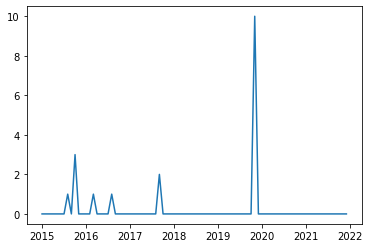

In [255]:
plt.plot(x.Date, x.Fatalities)

In [256]:
x.query("Year < 2018")

Date  Fatalities  Quarter
Region Year Month                                  
Awdal  2015 1      2015.000000         0.0      1.0
            2      2015.083333         0.0      1.0
            3      2015.166667         0.0      1.0
            4      2015.250000         0.0      2.0
            5      2015.333333         0.0      2.0
            6      2015.416667         0.0      2.0
            7      2015.500000         0.0      2.0
            8      2015.583333         1.0      3.0
            9      2015.666667         0.0      3.0
            10     2015.750000         3.0      3.0
            11     2015.833333         0.0      3.0
            12     2015.916667         0.0      4.0
       2016 1      2016.000000         0.0      1.0
            2      2016.083333         0.0      1.0
            3      2016.166667         1.0      1.0
            4      2016.250000         0.0      2.0
            5      2016.333333         0.0      2.0
            6      2016.416667         0.0      2.0
            7      2016.500000         0.0      2.0
            8      2016.583333         1.0      3.0
            9      2016.666667         0.0      3.0
            10     2016.750000         0.0      3.0
            11     2016.833333         0.0      3.0
            12     2016.916667         0.0      4.0
       2017 1      2017.000000         0.0      1.0
            2      2017.083333         0.0      1.0
            3      2017.166667         0.0      1.0
            4      2017.250000         0.0      2.0
            5      2017.333333         0.0      2.0
            6      2017.416667         0.0      2.0
            7      2017.500000         0.0      2.0
            8      2017.583333         0.0      3.0
            9      2017.666667         2.0      3.0
            10     2017.750000         0.0      3.0
            11     2017.833333         0.0      3.0
            12     2017.916667         0.0      4.0

In [257]:

x

Date  Fatalities  Quarter
Region Year Month                                  
Awdal  2015 1      2015.000000         0.0      1.0
            2      2015.083333         0.0      1.0
            3      2015.166667         0.0      1.0
            4      2015.250000         0.0      2.0
            5      2015.333333         0.0      2.0
...                        ...         ...      ...
       2021 8      2021.583333         0.0      3.0
            9      2021.666667         0.0      3.0
            10     2021.750000         0.0      3.0
            11     2021.833333         0.0      3.0
            12     2021.916667         0.0      4.0

[84 rows x 3 columns]

In [274]:
x = store.per_region_pred_data["Awdal"]["weather_df"].groupby(["Year", "Month"], as_index=False).mean()
x.Date = x.Year + (x.Month - 1) / 12
x.Quarter = x.Month // 4 + 1
x = x[["Year", "Month", "Date", "Temperature", "Quarter"]]
x = x.set_index(["Year", "Month"])
x.index = pd.MultiIndex.from_tuples([(ix[0], int(ix[1])) for ix in x.index.tolist()])
x.index.levels[-1].astype(int)

data = [(2015, 12, 2015 + 11/12, 70, 4)]

i = 0
for year in x.index.get_level_values(0).unique():
    for month in range(1, 13):
        try:
            q = x.loc[year, float(month)]
            data.append((year, month, q[0], q[1], q[2]))
        except KeyError:
            data.append((year, month, year + (month - 1) / 12, data[i][3], month // 4 + 1))
            
    i+=1 
            
df = pd.DataFrame(data, columns = ["Year", "Month", "Date", "Temperature", "Quarter"])        

In [275]:
data

[(2015, 12, 2015.9166666666667, 70, 4),
 (2016, 1, 2016.0, 70, 1),
 (2016, 2, 2016.0833333333333, 70, 1),
 (2016, 3, 2016.1666666666667, 70, 1),
 (2016, 4, 2016.25, 70, 2),
 (2016, 5, 2016.3333333333333, 70, 2),
 (2016, 6, 2016.4166666666667, 76.56666666666666, 2.0),
 (2016, 7, 2016.5, 70, 2),
 (2016, 8, 2016.5833333333333, 78.4, 3.0),
 (2016, 9, 2016.6666666666667, 80.11666666666667, 3.0),
 (2016, 10, 2016.75, 77.48888888888888, 3.0),
 (2016, 11, 2016.8333333333333, 70.48214285714285, 3.0),
 (2016, 12, 2016.9166666666667, 67.83703703703702, 4.0),
 (2017, 1, 2017.0, 68.29999999999998, 1.0),
 (2017, 2, 2017.0833333333333, 68.86538461538463, 1.0),
 (2017, 3, 2017.1666666666667, 77.35483870967744, 1.0),
 (2017, 4, 2017.25, 81.24999999999999, 2.0),
 (2017, 5, 2017.3333333333333, 79.98387096774192, 2.0),
 (2017, 6, 2017.4166666666667, 79.30689655172414, 2.0),
 (2017, 7, 2017.5, 77.58387096774192, 2.0),
 (2017, 8, 2017.5833333333333, 77.35806451612902, 3.0),
 (2017, 9, 2017.6666666666667, 78